In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_excel('vendas.xlsx')
df.head()

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.test)
df.test = le.transform(df.test)

le.fit(df.cliente_comprou)
df.cliente_comprou = le.transform(df.cliente_comprou)

In [10]:
x = df.drop(columns='cliente_comprou')
y = df['cliente_comprou']

In [12]:
tree = DecisionTreeRegressor()
model = tree.fit(x, y)

In [13]:
pred = model.predict(x)

x['real'] = df.cliente_comprou
y = pd.DataFrame(y)
x['predict'] = pred
x.head()



,media_rating,media_pedidos,test,real,predict
0,1.5,11,0,1,1.0
1,2.5,11,0,0,0.0
2,2.5,11,0,0,0.0
3,1.5,13,0,1,1.0
4,2.5,13,0,0,0.0


In [18]:
x.dtypes

media_rating     float64
media_pedidos      int64
test               int32
real               int32
predict            int64
dtype: object

In [16]:
x['predict'] = x['predict'].astype('int64')

In [17]:
x.head()

,media_rating,media_pedidos,test,real,predict
0,1.5,11,0,1,1
1,2.5,11,0,0,0
2,2.5,11,0,0,0
3,1.5,13,0,1,1
4,2.5,13,0,0,0


In [19]:
x['residuo'] = x['real'] - x['predict']
x['residuo'].unique()

array([0], dtype=int64)

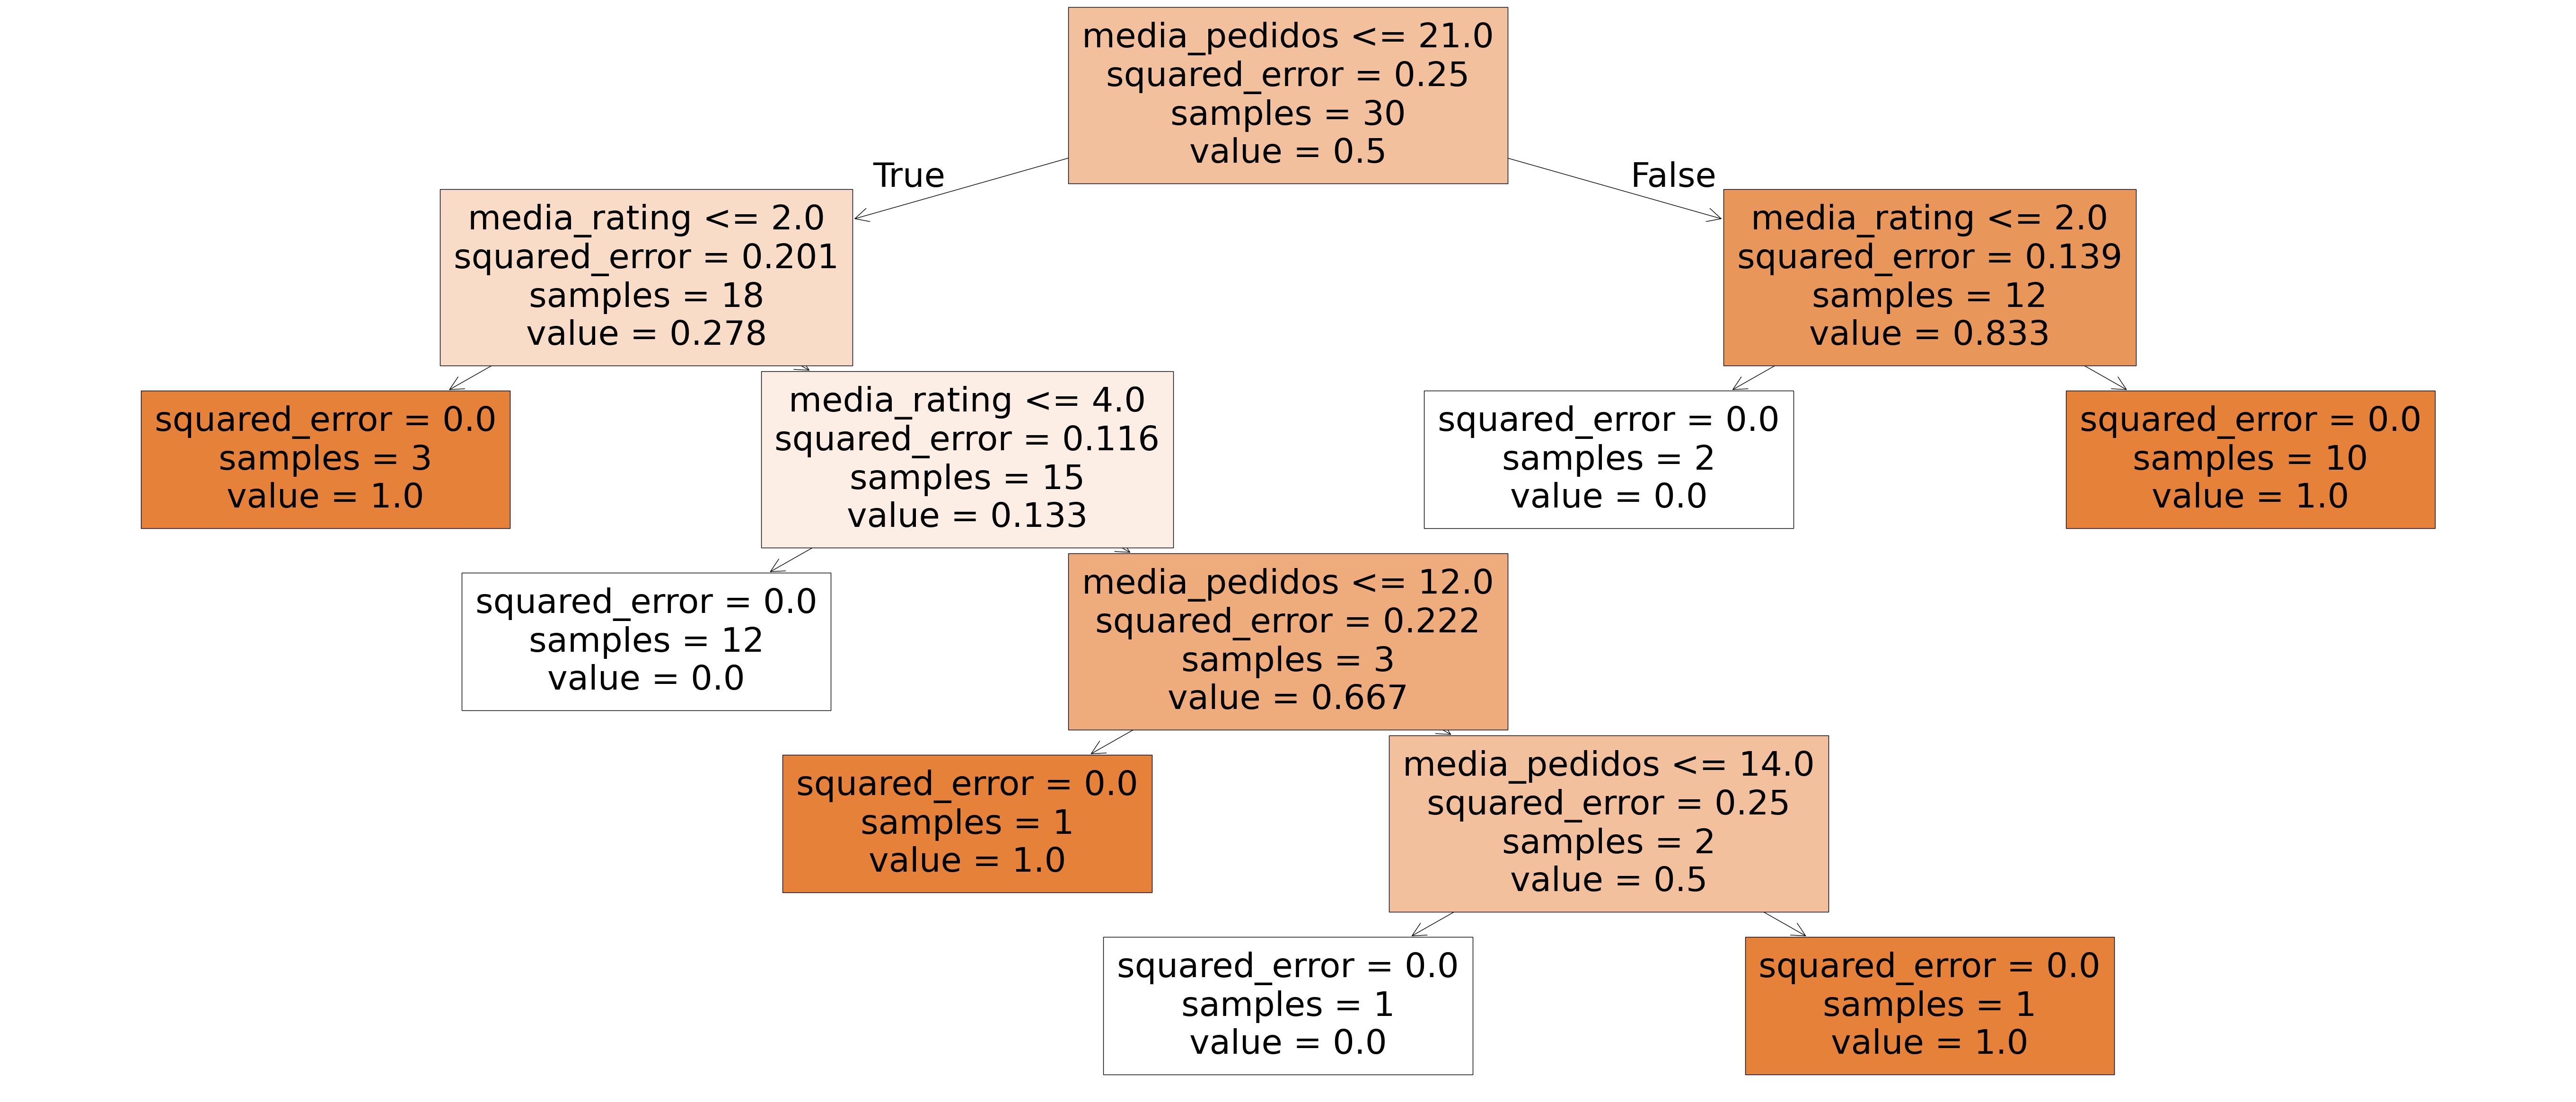

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(70,30))

fig = tree.plot_tree(model, feature_names=x.columns,  class_names=['yes', 'no'], filled=True)